# Shift-Share RS

## Notebook Description
...

## 0. Imports

### 0.1. Libraries

In [1]:
# Data manipulation libraries
import pandas            as pd
import numpy             as np
import geopandas         as gpd

# Data visualization libraries
import seaborn           as sns
import matplotlib        as mpl
import matplotlib.pyplot as plt

# Others
import warnings
import sys

### 0.2. Settings

In [2]:
# Ignoring warnings
warnings.filterwarnings('ignore')

# Pandas Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

# Visualization Settings
%matplotlib inline

# Set a style
mpl.style.use('ggplot') 

# Customize rcParams
mpl.rcParams.update({
    'figure.titlesize': 24,      
    'figure.figsize': (18, 6),   
    'figure.dpi': 150,           
    'axes.titlesize': 14,        
    'axes.labelsize': 12,        
    'axes.facecolor': 'white',   
    'axes.linewidth': 1,         
    'axes.grid': True,           
    'xtick.labelsize': 12,       
    'xtick.color': 'black',      
    'ytick.labelsize': 12,       
    'ytick.color': 'black',      
    'legend.fontsize': 12,       
    'lines.linewidth': 2,        
    'lines.markersize': 6,       
    'grid.color': 'lightgray',
    'grid.linewidth': 0.5,       
    'font.size': 12,             
    'font.family': 'sans-serif', 
    'font.sans-serif': ['Arial'],
})

# Set a color palette
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
sns.set_palette(sns.color_palette(color_palette)) 

# Display color palette
sns.color_palette(color_palette)

# System path
sys.path.append(r'C:\Users\caiop\OneDrive\repos\shift-share-rs')

### 0.3. Functions

In [3]:
def df_shape(df):
    """
    Summary: The function prints the number of rows and columns of a given DataFrame.
    Args: df: the DataFrame we want to know more about.
    Returns: text: text indicating the number of rows and columns of the DataFrame.
    """

    print('Number of rows: {}'.format(df.shape[0]))
    print('Number of columns: {}'.format(df.shape[1]))

    return None

def calculate_growth(df_list, crop_list, start_year, end_year):
    """
    Summary: Function to calculate delta and growth for each crop
    Args: df_list (list): List of dataframes
          crop_list (list): List of crops
          start_year (int): Starting year
          end_year (int): Ending year
    Returns: df (DataFrame): DataFrame with delta and growth for each crop
    """
    # Initialize the dataframe with the microregion from the first dataframe in the list
    df = pd.DataFrame()
    df['microregion'] = df_list[0]['microregion']
    
    # Loop through each crop and its corresponding dataframe in the list
    for i, crop in enumerate(crop_list):
        df_micro = df_list[i]
        
        # Calculate delta and growth for each crop
        df[f'delta_X{crop.capitalize()}k'] = df_micro[str(end_year)] - df_micro[str(start_year)]
        df[f'g{crop.capitalize()}k'] = df[f'delta_X{crop.capitalize()}k'] / df_micro[str(start_year)]
    
    return df

### 0.4. Classes

In [4]:
# Importing Data Processors
from src.data.make_datasets_01 import DatasetProcessor, InfoDataFrameProcessor

### 0.5. Datasets

In [5]:
# GeoData
# df_meso_geodata = gpd.read_file('../data/geodata/malha_mesorregioes.geojson')
df_micro_geodata = gpd.read_file('../data/geodata/malha_microrregioes.geojson')
# df_mun_geodata = gpd.read_file('../data/geodata/malha_municipios.geojson')

# Arroz
df_arroz    = pd.read_csv('../data/raw/rs_arroz_tabela_1612_ibge_pam.csv', skiprows=3, nrows=541, sep=',')

df_arroz_mu = DatasetProcessor(df_arroz.loc[1:], 'MU', value_name='arroz').process_data()
df_arroz_mi = DatasetProcessor(df_arroz.loc[1:], 'MI', value_name='arroz').process_data()
df_arroz_me = DatasetProcessor(df_arroz.loc[1:], 'ME', value_name='arroz').process_data()

# Milho
df_milho    = pd.read_csv('../data/raw/rs_milho_tabela_1612_ibge_pam.csv', skiprows=3, nrows=541, sep=',')

df_milho_mu = DatasetProcessor(df_milho.loc[1:], 'MU', value_name='milho').process_data()
df_milho_mi = DatasetProcessor(df_milho.loc[1:], 'MI', value_name='milho').process_data()
df_milho_me = DatasetProcessor(df_milho.loc[1:], 'ME', value_name='milho').process_data()

# Soja
df_soja     = pd.read_csv('../data/raw/rs_soja_tabela_1612_ibge_pam.csv', skiprows=3, nrows=541, sep=',')

df_soja_mu  = DatasetProcessor(df_soja.loc[1:], 'MU', value_name='soja').process_data()
df_soja_mi  = DatasetProcessor(df_soja.loc[1:], 'MI', value_name='soja').process_data()
df_soja_me  = DatasetProcessor(df_soja.loc[1:], 'ME', value_name='soja').process_data()

# DataFrame informativo
df_info     = InfoDataFrameProcessor(df_soja).process_data()

## 1. Data Description

In [6]:
mesoregions = df_soja_me.cod_ibge.unique()
df_info[df_info['cod_ibge'].isin(mesoregions)]

,nivel,cod_ibge,nome
499,ME,4301,Noroeste Rio-grandense (RS)
500,ME,4302,Nordeste Rio-grandense (RS)
501,ME,4303,Centro Ocidental Rio-grandense (RS)
502,ME,4304,Centro Oriental Rio-grandense (RS)
503,ME,4305,Metropolitana de Porto Alegre (RS)
504,ME,4306,Sudoeste Rio-grandense (RS)
505,ME,4307,Sudeste Rio-grandense (RS)


<Axes: xlabel='ano', ylabel='soja'>

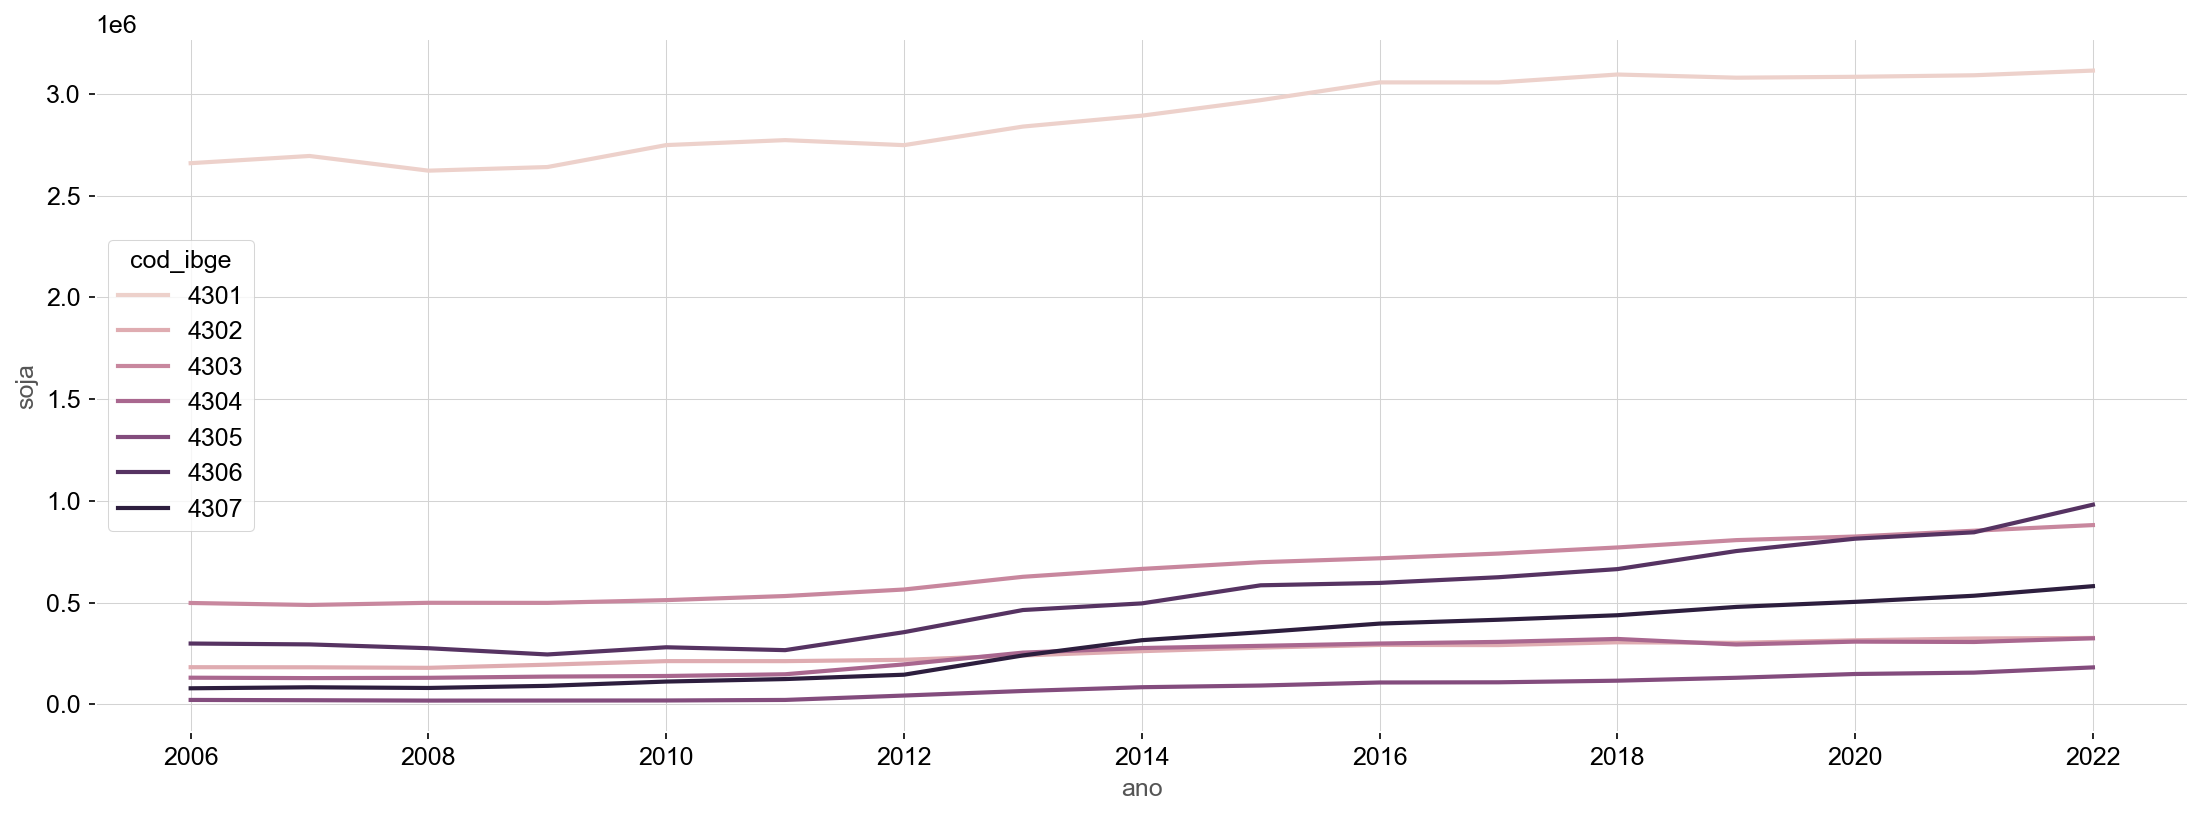

In [12]:
sns.lineplot(x='ano', y='soja', hue='cod_ibge', data=df_soja_me, legend=True)

<Axes: xlabel='ano', ylabel='soja'>

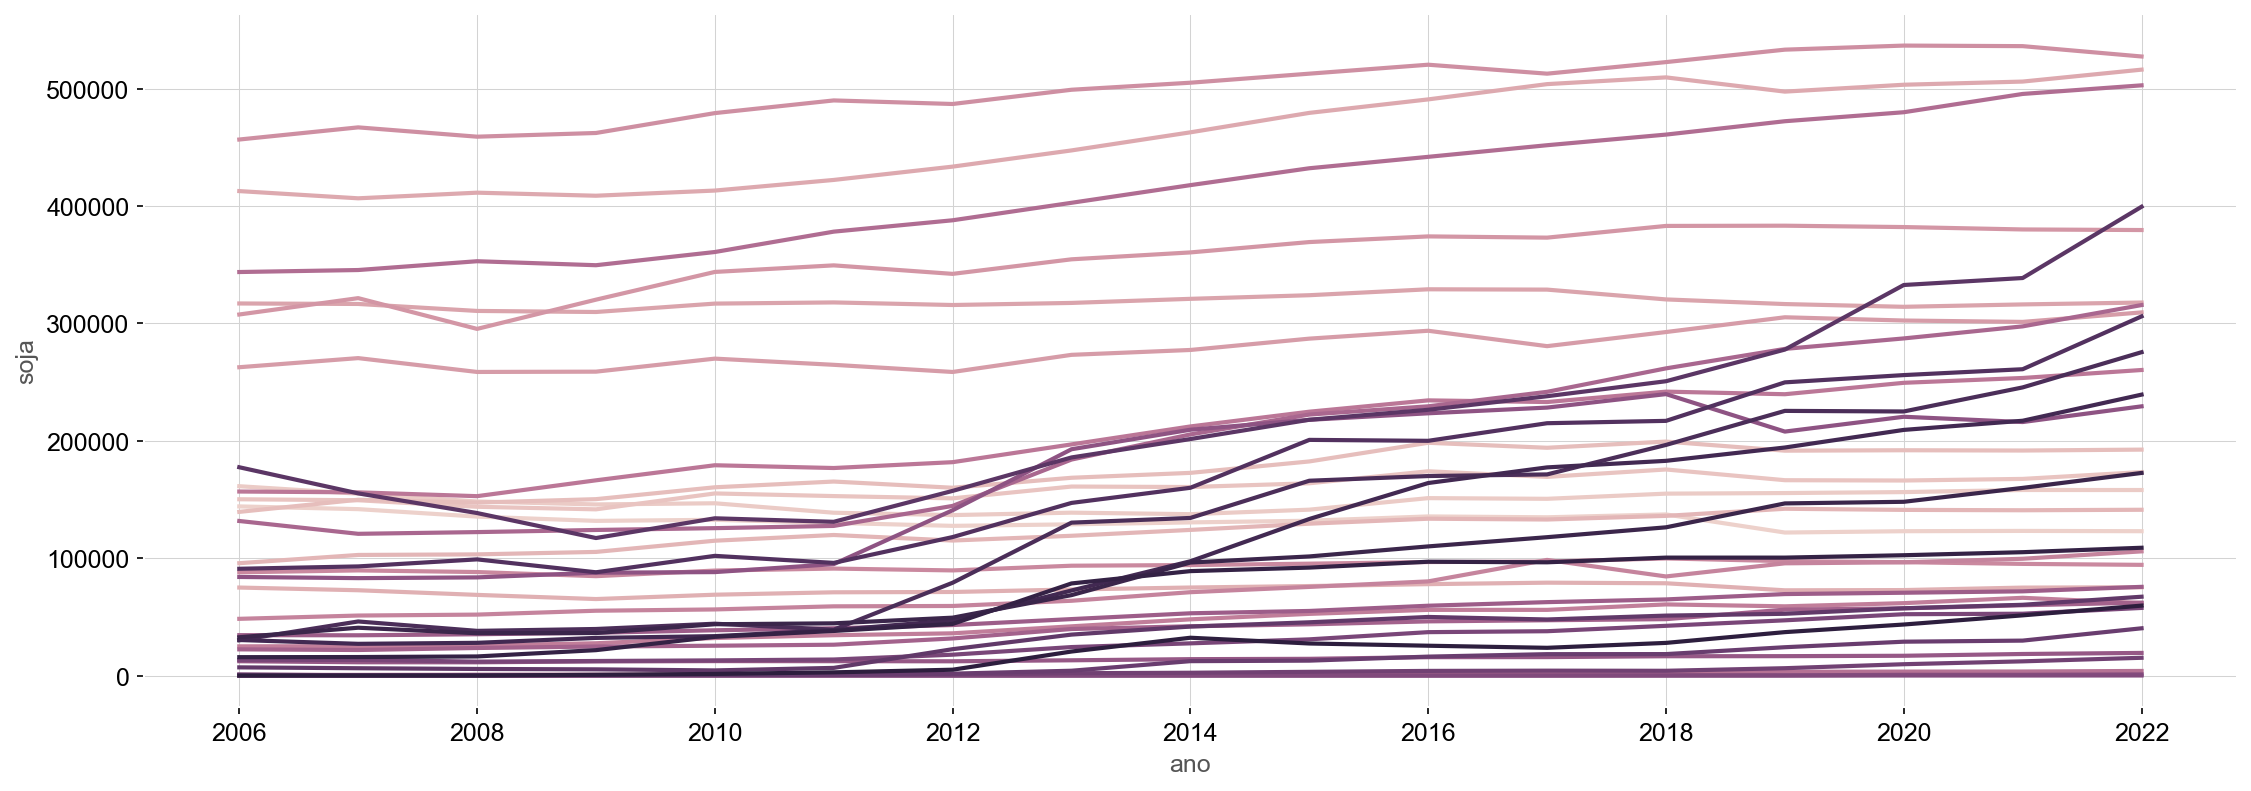

In [13]:
sns.lineplot(x='ano', y='soja', hue='cod_ibge', data=df_soja_mi, legend=False)

## 2. Shift-Share Calculations

### 2.1. Variations over years

In [78]:
g06_10 = calculate_growth([df_micro_soy, df_micro_corn, df_micro_rice], ['soy', 'corn', 'rice'], 2006, 2010)

g10_14 = calculate_growth([df_micro_soy, df_micro_corn, df_micro_rice], ['soy', 'corn', 'rice'], 2010, 2014)

g14_18 = calculate_growth([df_micro_soy, df_micro_corn, df_micro_rice], ['soy', 'corn', 'rice'], 2014, 2018)

g18_22 = calculate_growth([df_micro_soy, df_micro_corn, df_micro_rice], ['soy', 'corn', 'rice'], 2018, 2022)

In [81]:
g06_10

,microregion,delta_XSoyk,gSoyk,delta_XCornk,gCornk,delta_XRicek,gRicek
0,Cachoeira do Sul,4140,0.05,-2235,-0.11,1134,0.02
1,Camaquã,-2590,-0.37,1520,0.09,13047,0.19
2,Campanha Central,11000,0.12,-300,-0.04,2210,0.03
3,Campanha Meridional,14100,0.47,650,0.08,5535,0.09
4,Campanha Ocidental,-43480,-0.24,-8680,-0.24,14884,0.05
5,Carazinho,7320,0.03,-14225,-0.21,-379,-0.48
6,Caxias do Sul,418,0.70,-545,-0.02,-16,-0.70
7,Cerro Largo,-6100,-0.08,-2120,-0.05,-110,-0.87
8,Cruz Alta,22508,0.05,-24270,-0.44,-117,-0.55
9,Erechim,20941,0.15,-48840,-0.40,-150,-0.49


In [ ]:
growth = g06_10.merge(g10_14, on='microregion', suffixes=('_06_10', '_10_14')).merge(g14_18, on='microregion', suffixes=('_10_14', '_14_18')).merge(g18_22, on='microregion', suffixes=('_14_18', '_18_22'))

growth

# Table 5. Decomposition of Growth into Components of Variation

### 5.1. Structural Component

### 5.2. Regional Component

### 5.3. National Component

### 5.4. Effective Variation (1+2+3)

In [27]:
df_info = 

In [9]:
# Filtering to municipalities
df_mun_soja = df[df['Nível'] == 'MU']

# Dropping unnecessary columns
df_mun_soja = df_mun_soja.drop(['Nível', 'Unidade da Federação, Município, Mesorregião Geográfica e Microrregião Geográfica'], axis=1)

# Renaming columns
df_mun_soja.rename(columns={'Cód.': 'cod_ibge'}, inplace=True)

# Melting the DataFrame
df_mun_soja = pd.melt(df_mun_soja, id_vars=['cod_ibge'], var_name='year', value_name='soybeans_area')

# Converting data types
df_mun_soja['cod_ibge']       = df_mun_soja['cod_ibge'].astype('int64')
df_mun_soja['year']           = df_mun_soja['year'].astype('int64')
df_mun_soja['soybeans_area']  = df_mun_soja['soybeans_area'].replace(['-', '...'], 0).astype('int64')

# Display data
print(df_mun_soja.info())
df_mun_soja

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8449 entries, 0 to 8448
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   cod_ibge       8449 non-null   int64
 1   year           8449 non-null   int64
 2   soybeans_area  8449 non-null   int64
dtypes: int64(3)
memory usage: 198.1 KB
None


,cod_ibge,year,soybeans_area
0,4300034,2006,2000
1,4300059,2006,10920
2,4300109,2006,0
3,4300208,2006,19000
4,4300307,2006,4500
...,...,...,...
8444,4323606,2022,1300
8445,4323705,2022,3800
8446,4323754,2022,10950
8447,4323770,2022,50
